# Notebook-1 : Introduction to Qiskit Fundamentals

Hello everyone, welcome to 2025 edition Qiskit Fall Fest at IISER, Kolkata. We begin with this notebook which will equip you with the knowldge of basic functionalities of qiskit. Hope you have a fun time solving these exercizes.

In [5]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService


In [7]:
from qiskit import __version__

print(__version__)

2.2.1


## Vectors and matrices in Python

Qiskit uses the Python programming language, so before discussing Qiskit specifically, it may be helpful to very briefly discuss matrix and vector computations in Python.

In Python, matrix and vector computations can be performed using the `array` class from the `NumPy` library, which provides functionality for many numerical and scientific computations.
The following code loads this library, defines two column vectors, `ket0` and `ket1`, corresponding to the qubit state vectors $\vert 0\rangle$ and $\vert 1\rangle,$ and then prints their average.

In [8]:
import numpy as np

ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])
M = np.array([[0, 1], [1, 0]])  # Pauli-X gate
print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


We can perform operations like addition, scalar multiplication, and inner products using standard operators.
Either we use built-in functions or methods from the NumPy library.

To visualize vectors and matrices, you can use Qiskit's built-in visualization tools.

We use the `array_to_latex` function in Qiskit, from the `qiskit.visualization` module.
Note that, in the code that follow, we're using Python's generic `display` function.
In contrast, the specific behavior of `print` may depending on what is printed, such as it does for arrays defined by `NumPy`.

In [9]:
from qiskit.visualization import array_to_latex
display(array_to_latex(ket0))
display(array_to_latex(ket1))
display(array_to_latex(ket0 / 2 + ket1 / 2))
display(array_to_latex(M))
display(array_to_latex(np.matmul(M, ket1)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## States, measurements, and operations

Qiskit includes several classes that allow for states, measurements, and operations to be created and manipulated — so there is no need to program everything required to simulate quantum states, measurements, and operations in Python.
Some examples to help you to get started are included below.

### Define and display state vectors

The`Statevector` class in Qiskit provides functionality for defining and manipulating quantum state vectors.
In the code that follows, the `Statevector` class is imported and a few vectors are defined.



In [10]:
from qiskit.quantum_info import Statevector
from numpy import sqrt
a = Statevector([1, 0]) # |0>
b = Statevector([0, 1]) # |1>
u = Statevector([1 / sqrt(2), 1 / sqrt(2)]) # [|0> + |1>] / sqrt(2)
v = Statevector([(1 + 2.0j) / 3, -2 / 3]) # [(1 + 2i) / 3 |0> - (2 / 3) |1>]
w = Statevector([1 / 3, 2 / 3]) # [1/3 |0> + 2/3 |1>] not a valid statevector sum of squares != 1

The `Statevector` class includes a `draw` method for displaying state vectors in a variety of ways, including
`text` for plain text, `latex` for rendered LaTeX, and `latex_source` for LaTeX code, which can be handy for cutting and pasting into documents.
(Use `print` rather than `display` to show LaTeX code for best results.)

You can verify that a vector is a valid state vector by using the `is_valid` method, which checks that the sum of the squares of the amplitudes is equal to 1.
The `Statevector` class also includes the `is_valid` method, which checks to see if a given vector is a valid quantum state vector (in other words, that it has Euclidean norm equal to 1).

You can also visualize state vectors on the Bloch sphere using the `plot_bloch_multivector` function from the `qiskit.visualization` module, we will see an example of this later.


In [11]:
display(u.draw("text"))
display(u.draw("latex"))
display(u.is_valid())
#Now check if w is a valid statevector
display(w.draw("latex"))
display(w.is_valid())

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

True

<IPython.core.display.Latex object>

False

### Simulating measurements using `Statevector`

Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the `measure` method from the `Statevector` class.
Let's use the same qubit state vector `v` defined previously.

The `measure` method simulates a standard basis measurement of the quantum state vector.

It returns the outcome of that measurement, plus the new quantum state vector of the system after the measurement.
(Here we're using Python's `print` function with an `f` prefix for formatted printing with embedded expressions.)

In [34]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [53]:
outcome, state = v.measure()
if outcome == '0':
    print(f"Measured: {outcome}\nwith probability {v.probabilities()[0]}\nPost-measurement normalized state:")
else:
    print(f"Measured: {outcome}\nwith probability {v.probabilities()[1]}\nPost-measurement normalized state:")
display(state.draw("latex"))

Measured: 0
with probability 0.5555555555555556
Post-measurement normalized state:


<IPython.core.display.Latex object>

Measurement outcomes are probabilistic, so this method can return different results when run multiple times.
For the particular example of the vector `v` defined above, the `measure` method defines the quantum state vector after the measurement takes place to be

$$
\biggl(\frac{1 + 2i}{\sqrt{5}}\biggr) \vert 0\rangle
$$

(rather than $\vert 0\rangle$) or

$$
- \vert 1\rangle
$$

(rather than $\vert 1\rangle$), depending on the measurement outcome.
In both cases, the alternatives to $\vert 0\rangle$ and $\vert 1\rangle$ are, in fact, equivalent to these state vectors; they are said to to *equivalent up to a global phase* because one is equal to the other multiplied by a complex number on the unit circle.



`Statevector` will throw an error if the `measure` method is applied to an invalid quantum state vector.

`Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system, each time starting with a fresh copy of the state. For example, the following code shows the outcome of measuring the vector `v` $1000$ times, which (with high probability) results in the outcome $0$ approximately $5$ out of every $9$ times (or about $556$ of the $1000$ trials) and the outcome $1$ approximately $4$ out of every $9$ times (or about $444$ out of the $1000$ trials).
The code that follows also demonstrates the `plot_histogram` function from the `qiskit.visualization` module for visualizing the results.



Estimated probabilities from sampling: p(0) = 0.5498, p(1) = 0.4502
Theoretical probabilities: p(0) = 0.5555555555555556, p(1) = 0.4444444444444444


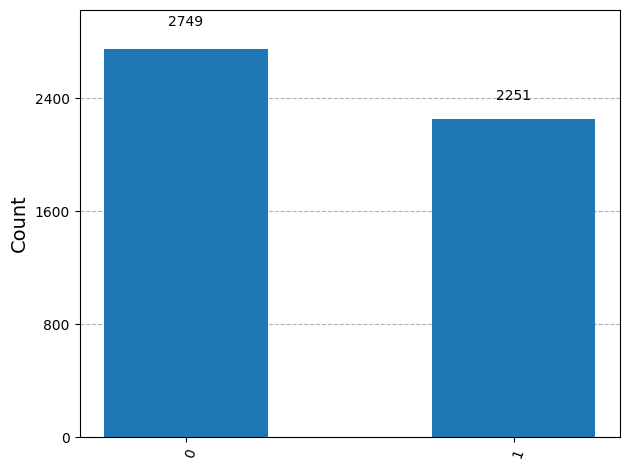

In [12]:
from qiskit.visualization import plot_histogram
n = 5000
statistics = v.sample_counts(n)
# print(statistics)
p_0 = statistics.get('0', 0) / n
p_1 = statistics.get('1', 0) / n
print(f"Estimated probabilities from sampling: p(0) = {p_0}, p(1) = {p_1}")
print(f"Theoretical probabilities: p(0) = {v.probabilities()[0]}, p(1) = {v.probabilities()[1]}")
plot_histogram(statistics)

Running this code on your own multiple times, with different numbers of samples in place of $1000,$ may be helpful for developing some intuition for how the number of trials influences the number of times each outcome appears.
With more and more samples, the fraction of samples for each possibility is likely to get closer and closer to the corresponding probability.
This phenomenon, more generally speaking, is known as the *law of large numbers* in probability theory.



# Exercize - 1 : Creating Pauli Operators in Qiskit

Write the code to create the following pauli opeartors - **XXX, IYY, ZIZ, XYX**. Remember the right most operator acts on the first qubit of your quantum circuit.

In [15]:
#XXX
pauli_op = Pauli('XXX')

print(pauli_op)
display(array_to_latex(pauli_op.to_matrix()))

#IYY
pauli_op = Pauli('IYY')

print(pauli_op)
display(array_to_latex(pauli_op.to_matrix()))

#ZIZ
pauli_op = Pauli('ZIZ')

print(pauli_op)
display(array_to_latex(pauli_op.to_matrix()))


#XYX
pauli_op = Pauli('ZZ')

print(pauli_op)
display(array_to_latex(pauli_op.to_matrix()))


XXX


<IPython.core.display.Latex object>

IYY


<IPython.core.display.Latex object>

ZIZ


<IPython.core.display.Latex object>

ZZ


<IPython.core.display.Latex object>

# Exercize - 2 : Creating Your First Quantum Circuit

This code defines a quantum circuit `qc` that applies three single-qubit gates in sequence to a single qubit, starting from the initial state $\vert 0\rangle$.
In particular, we may define a quantum circuit (which, in this case, will simply be a sequence of unitary operations performed on a single qubit) as follows.


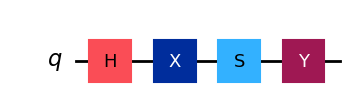

In [57]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0) # Apply Hadamard gate to qubit 0
circuit.x(0) # Apply pauli-X gate to qubit 0 which acts like a NOT gate
circuit.s(0) # apply S gate to qubit 0
circuit.y(0) # apply Y gate to qubit 0

display(circuit.draw(output="mpl"))

**Exercise 2:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Puts the qubit in the state |1⟩.
3. Apply the hadamard gate on the above state and create a superpostion state
4. run the quantum circuit using a quantum simulator and check your results 

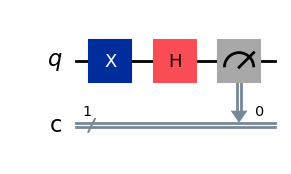

In [5]:
qc = QuantumCircuit(1,1)

qc.x(0)
qc.h(0)
qc.measure(0,0)
qc.draw("mpl")



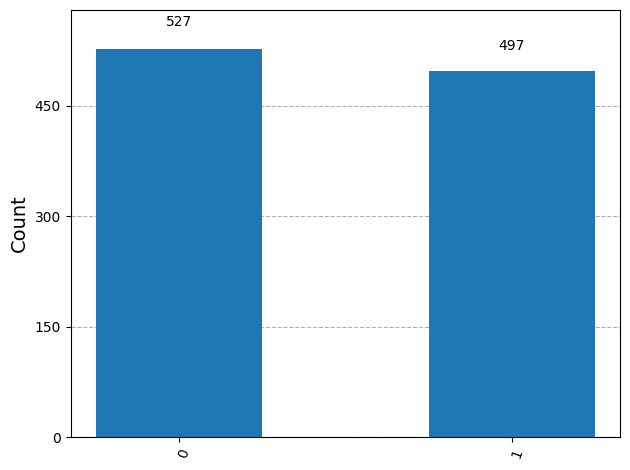

In [6]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()
counts = result[0].data.c.get_counts()

plot_histogram(counts, sort='value_desc')

# Exercize - 3 : Creating multi-qubit Quantum Circuits

**Exercise 3:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains 3 qubits .
2. Puts the qubit in the state |000⟩.
3. Apply the hadamard gate on all the three qubits and cnot gate from (0,1) and (1,2) to create the 3-qubit ghz state |000> + |111> .
4. run the quantum circuit using a quantum simulator and check your results 

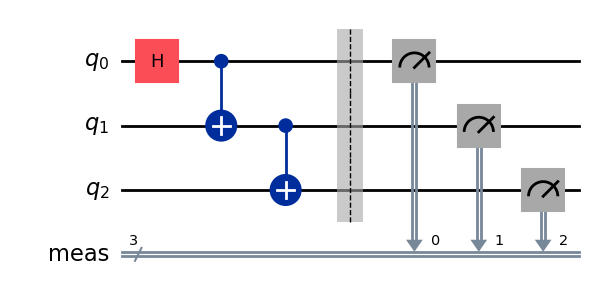

In [23]:
#starts out with the state |000>
qc = QuantumCircuit(3)

# Apply Hadamard gates to all qubits
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()
qc.draw("mpl")

Measurement counts: {'000': 2482, '111': 2518}


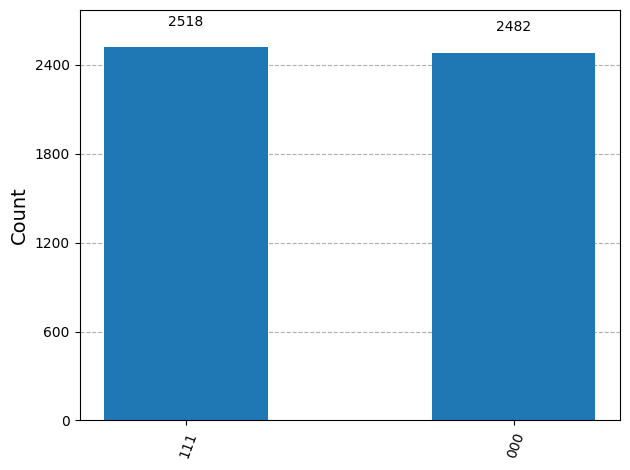

In [24]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(qc)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')
plot_histogram(counts, sort='value_desc')

# Exercize - 4 : Implementing Rotation gates and Bloch Sphere Visualization

**Exercise 4:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains 3 qubits 
2. Apply a rotation around y-axis by an angle of pi/4 on 1st qubit
3. Apply a rotation around x-axis by an angle of 3*pi/4 on 2nd qubit
4. Apply a rotation around z-axis by an angle of pi/2 on 3rd qubit 
5. See the rotations of the Bloch sphere by the action of our rotation gates

Probabilities: {np.str_('000'): np.float64(0.12500000000000006), np.str_('001'): np.float64(0.02144660940672625), np.str_('010'): np.float64(0.7285533905932737), np.str_('011'): np.float64(0.12500000000000006)}


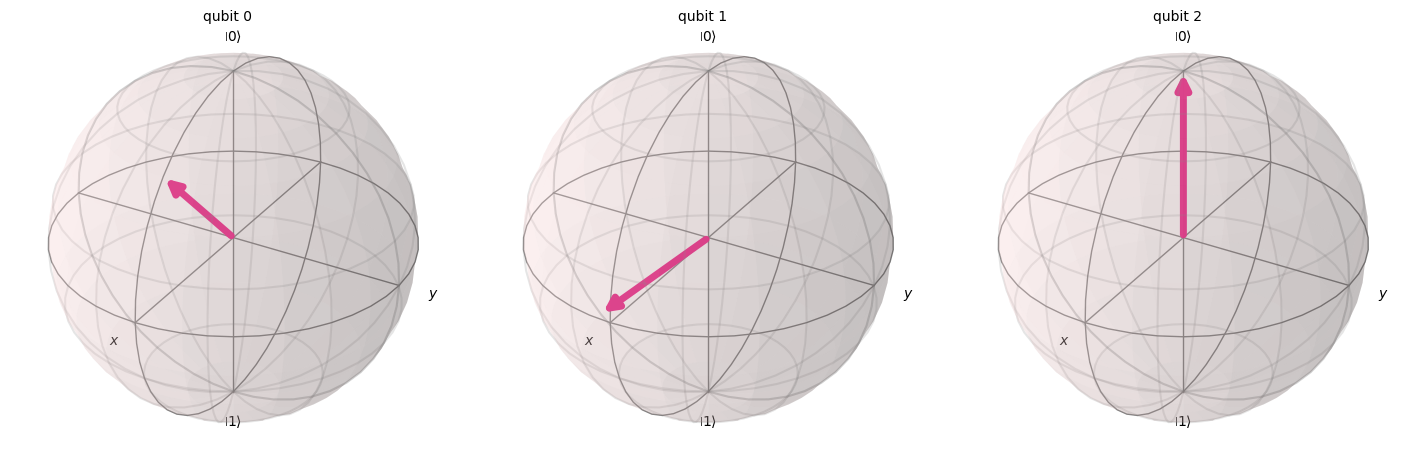

In [9]:
qc = QuantumCircuit(3)

qc.ry(np.pi / 4, 0)
qc.rx(3 * np.pi / 4, 1)
qc.rz(np.pi / 2, 2)

sv = Statevector(qc)
probs = sv.probabilities_dict() #retrieve probabilities of each basis state after applying the gates
print(f'Probabilities: {probs}')
plot_bloch_multivector(sv)

# Exercize - 5 : Parametrized Quantum Circuits

**Exercise 5:**
Write code that performs following functionality:
1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a quantum circuit `qc` that contains one qubit.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Draws the `qc` circuit.
5. Creates a new circuit `bound_qc` by binding the parameter `theta` to the value `π/2`.
6. Draws the `bound_qc` circuit.

Original Unbound Circuit:


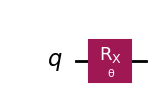

New Bound Circuit:


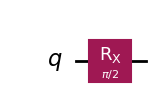

In [29]:
theta = Parameter('θ')
qc = QuantumCircuit(1)
qc.rx(theta, 0)

print('Original Unbound Circuit:')
display(qc.draw('mpl'))

bound_qc = qc.assign_parameters({theta: np.pi/2})

print('New Bound Circuit:')
bound_qc.draw('mpl')

# Exercize - 6 : Calculating expectation values of observables in Qiskit

**Exercise 6:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state i.e |00> + |11> .
2. Defines the ZZ observable using `SparsePauliOp`
3. Transpiles the circuit using the `AerSimulator` backend.
4. Applies the observable to the circuit layout
5. Initializes the `Estimator` primitive with the `AerSimulator` backend.
6. Runs the Estimator.
4. Gets the PUB result.
5. Retrieves and prints the expectation value.

In [47]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

observable = SparsePauliOp('ZZ')

backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

isa_observable = observable.apply_layout(isa_bell.layout)

estimator = Estimator(mode=backend)

job = estimator.run([(isa_bell, isa_observable)])
result = job.result()

pub_result = result[0]
exp_val = pub_result.data.evs
print(f'Expectation value for ZZ: {exp_val}')

Expectation value for ZZ: 1.0


# Congratulations ! You have learnt the basics of Quantum Computing using Qiskit.